In [69]:
from PIL import Image
import numpy as np
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2
import random
from math import log
from google.colab.patches import cv2_imshow
from tqdm import tqdm

In [70]:
# Downloading HorizonZero.png
!wget https://drive.google.com/uc?id=1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm
!mv uc?id=1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm HorizonZero.png


--2023-10-12 16:28:00--  https://drive.google.com/uc?id=1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm
Resolving drive.google.com (drive.google.com)... 209.85.234.138, 209.85.234.100, 209.85.234.113, ...
Connecting to drive.google.com (drive.google.com)|209.85.234.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-40-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rsk5624sggvcmks74rgp141sh64uefin/1697128050000/05356688754188258246/*/1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm?uuid=7634146b-1c5f-40b6-a082-eb3a3075d28a [following]
--2023-10-12 16:28:00--  https://doc-08-40-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rsk5624sggvcmks74rgp141sh64uefin/1697128050000/05356688754188258246/*/1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm?uuid=7634146b-1c5f-40b6-a082-eb3a3075d28a
Resolving doc-08-40-docs.googleusercontent.com (doc-08-40-docs.googleusercontent.com)... 142.250.148.132, 2607:f8b0:4001:c54::84
Connecting to doc-0

In [71]:
def ArnoldCatTransform(img, num):
    rows, cols, ch = img.shape
    n = rows
    img_arnold = np.zeros([rows, cols, ch])
    for x in range(0, rows):
        for y in range(0, cols):
            img_arnold[x][y] = img[(x+y)%n][(x+2*y)%n]
    return img_arnold

In [72]:
def ArnoldCatEncryption(imageName, key):
    img = cv2.imread(imageName)
    for i in range (0,key):
        img = ArnoldCatTransform(img, i)
    cv2.imwrite("Chaotic_encrypted.jpg", img)
    return img

In [73]:
def ArnoldCatDecryption(imageName, key):
    img = cv2.imread(imageName)
    rows, cols, ch = img.shape
    dimension = rows
    decrypt_it = dimension
    if (dimension%2==0) and 5**int(round(log(dimension/2,5))) == int(dimension/2):
        decrypt_it = 3*dimension
    elif 5**int(round(log(dimension,5))) == int(dimension):
        decrypt_it = 2*dimension
    elif (dimension%6==0) and  5**int(round(log(dimension/6,5))) == int(dimension/6):
        decrypt_it = 2*dimension
    else:
        decrypt_it = int(12*dimension/7)
    for i in range(key,decrypt_it):
        img = ArnoldCatTransform(img, i)
    cv2.imwrite("Chaotic_decrypted.png",img)
    return img

In [74]:
image = "HorizonZero"
ext = ".png"
key = 20

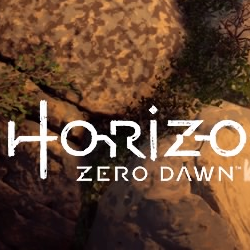

In [76]:
img = cv2.imread(image + ext)
cv2_imshow(img)

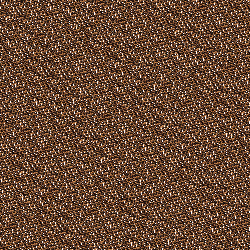

In [77]:
ArnoldCatEncryptionIm = ArnoldCatEncryption(image + ext, key)
cv2_imshow(ArnoldCatEncryptionIm)

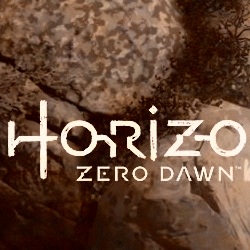

In [78]:
ArnoldCatDecryptionIm = ArnoldCatDecryption("Chaotic_encrypted.jpg", key)
cv2_imshow(ArnoldCatDecryptionIm)

In [79]:
pip install scikit-image

In [80]:
pip install imagehash

In [81]:
from skimage.metrics import structural_similarity as ssim
from math import log10, sqrt
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import deque
from PIL import Image
import imagehash
import matplotlib.pyplot as plt
import hashlib
import collections
import ctypes
import array
import os
import sys
import time
from skimage.metrics import structural_similarity as ssim
from math import log10, sqrt
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [82]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more similar the two images are
    return err

original1 = cv2.imread("HorizonZero.png")
contrast1 = cv2.imread("Chaotic_decrypted.png")

original = cv2.cvtColor(original1, cv2.COLOR_BGR2GRAY)
contrast = cv2.cvtColor(contrast1, cv2.COLOR_BGR2GRAY)

s = ssim(original, contrast)
m = mse(original, contrast)
p=PSNR(original, contrast)

print("SSIM:",s);
print("MSE:",m);
print("PSNR:",p);

SSIM: 0.9844899103842103
MSE: 5.828416
PSNR: 40.4752981913289
